# Titanic Binary Classification – Regresión Logística y Árboles de Decisión

Este proyecto explora el dataset del Titanic preparado específicamente para modelos de clasificación binaria, aplicando regresión logística y árboles de decisión.

## 🎯 Objetivo

Utilizar un dataset modificado del Titanic para entrenar modelos supervisados que predigan la probabilidad de supervivencia de los pasajeros.

## 🧪 Tecnologías utilizadas

- Python
- Pandas, NumPy
- scikit-learn
- Seaborn, Matplotlib

## ⚙️ Proceso

1. Limpieza de datos:
   - Eliminación de columnas irrelevantes (`zero*`)
   - Tratamiento de valores nulos}
   - Renombrado de columnas mal escritas

2. Modelado:
   - División de datos en entrenamiento y prueba
   - Entrenamiento con:
     - Árbol de decisión
     - Regresión logística
   - Evaluación con accuracy y matriz de confusión

3. Visualización:
   - Gráficos de sobrevivientes por sexo
   - Matriz de confusión

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import os

In [14]:
df1=pd.read_csv("Titanic.csv", sep="," , encoding="Latin1")

In [15]:
#realizamos una exploracion rapida de los datos
df1.head()


,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
0,1,22.0,7.2500,0,1,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1,2,38.0,71.2833,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,1
2,3,26.0,7.9250,1,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,1
3,4,35.0,53.1000,1,1,0,0,0,0,0,...,0,0,0,1,0,0,2.0,0,0,1
4,5,35.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0


In [18]:
# Eliminar columnas que empiezan con "zero"
zero_cols = [col for col in df1.columns if col.startswith("zero")]
df1 = df1.drop(columns=zero_cols)

In [19]:
df1.head()

,Passengerid,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked,2urvived
0,1,22.0,7.2500,0,1,0,3,2.0,0
1,2,38.0,71.2833,1,1,0,1,0.0,1
2,3,26.0,7.9250,1,0,0,3,2.0,1
3,4,35.0,53.1000,1,1,0,1,2.0,1
4,5,35.0,8.0500,0,0,0,3,2.0,0


In [21]:
#vamos a corregir el nombre de las columnas
df1 = df1.rename(columns={'2urvived': 'Survived', 'Passengerid': 'PassengerId'})

In [22]:
#vamos a eliminar los valores nulos
df1 = df1.dropna()


In [24]:
# Definir variables predictoras y target
X = df1.drop(['Survived', 'PassengerId'], axis=1)
y = df1['Survived']

In [25]:
# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=66)

In [26]:
# Entrenar modelo de Árbol de Decisión
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

In [27]:
# Entrenar Regresión Logística
log = LogisticRegression(max_iter=1000)
log.fit(X_train, y_train)
y_pred_log = log.predict(X_test)

In [28]:
# Resultados
print("Precisión Árbol de Decisión:", accuracy_score(y_test, y_pred_tree))
print("Precisión Regresión Logística:", accuracy_score(y_test, y_pred_log))

Precisión Árbol de Decisión: 0.7633587786259542
Precisión Regresión Logística: 0.767175572519084


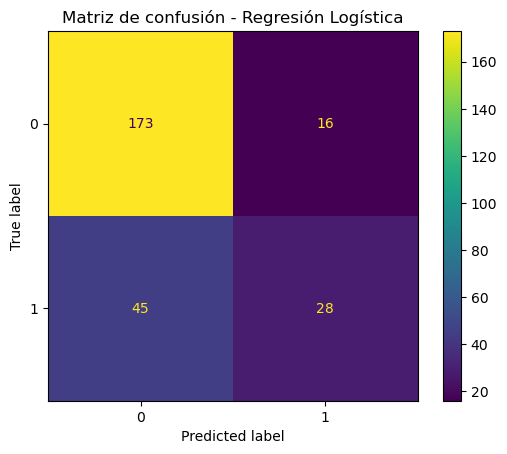

In [29]:
# Matriz de Confusión para LogReg
cm = confusion_matrix(y_test, y_pred_log)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Matriz de confusión - Regresión Logística")
plt.show()

Análisis:

Verdaderos negativos (TN): 173 pasajeros no sobrevivieron y fueron correctamente clasificados.

Falsos positivos (FP): 16 pasajeros fueron clasificados como sobrevivientes pero no lo eran.

Falsos negativos (FN): 45 pasajeros sí sobrevivieron pero fueron clasificados como no sobrevivientes.

Verdaderos positivos (TP): 28 pasajeros sobrevivieron y fueron correctamente clasificados.

Indicadores clave:

El modelo tiene mayor precisión en detectar no sobrevivientes (clase 0).

Alto número de falsos negativos (45) → esto implica que el modelo falla bastante al predecir a los sobrevivientes.

Posible desbalance de clases o importancia insuficiente de variables predictoras relacionadas con la supervivencia (ej. sexo, clase, edad).

In [31]:
# Análisis de género
survivors = df1[df1['Survived'] == 1]
print("Sobrevivientes por sexo:")
print(survivors['Sex'].value_counts())


Sobrevivientes por sexo:
Sex
1    231
0    109
Name: count, dtype: int64


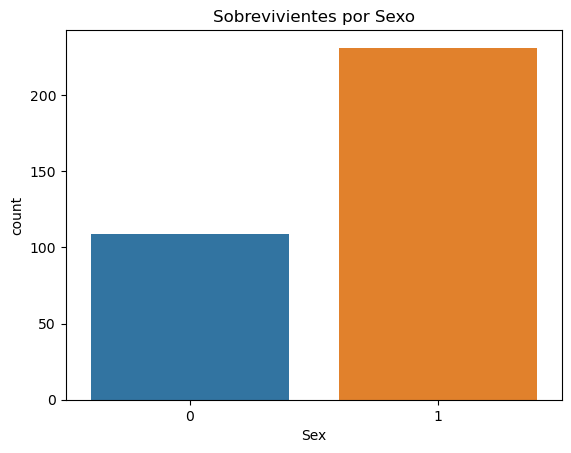

In [32]:
sns.countplot(data=survivors, x='Sex')
plt.title('Sobrevivientes por Sexo')
plt.show()

El gráfico muestra que hay más mujeres sobrevivientes (Sex = 1) que hombres.

Esto confirma el patrón histórico del Titanic, donde las mujeres y los niños tenían prioridad en los botes salvavidas.

In [36]:
#vamos a predecir la probabilidad de sobrevivencia de una persona en particular
# Ejemplo: predecir la probabilidad de supervivencia de un pasajero

nuevo_pasajero = np.array([[26, 53, 0, 1, 1, 1, 2]])  # ejemplo con tus variables

# Predecir probabilidad con el modelo de regresión logística
probabilidad = log.predict_proba(nuevo_pasajero)[0][1]
print(f"Probabilidad de que el pasajero sobreviva: {probabilidad:.2f}")

Probabilidad de que el pasajero sobreviva: 0.26


C:\Users\elcar\Documents\anaconda\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
